### EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering

## Name : Y.L.A. Epa

## Index Number : 210156U



Question 1

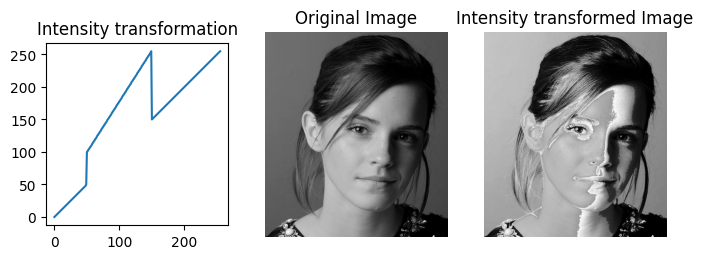

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


img = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(50,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(150,255,106)
t = np.concatenate((t1,t2,t3,t4),axis=0).astype(np.uint8)
assert len(t)==256

g = cv.LUT(img,t)
fig, ax = plt.subplots(1,3,figsize=(8,8))
ax[0].plot(t), ax[0].set_title("Intensity transformation"), ax[0].set_aspect('equal')
ax[1].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[1].axis('off'), ax[1].set_title("Original Image")
ax[2].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Intensity transformed Image")	
plt.show()


Question 2

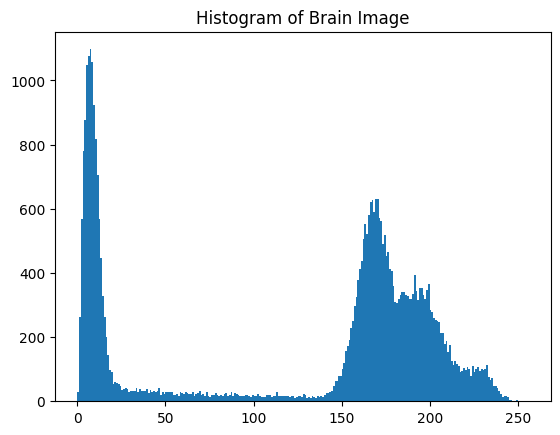

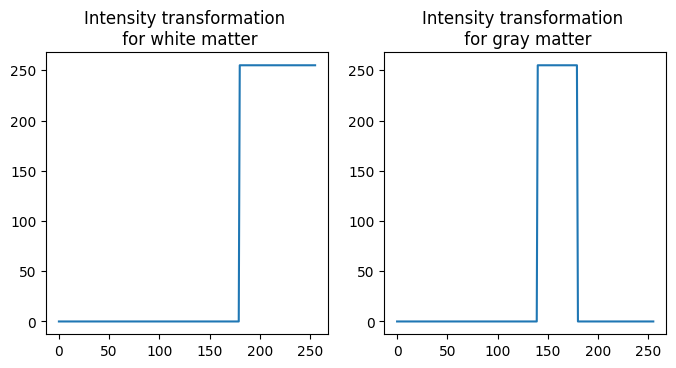

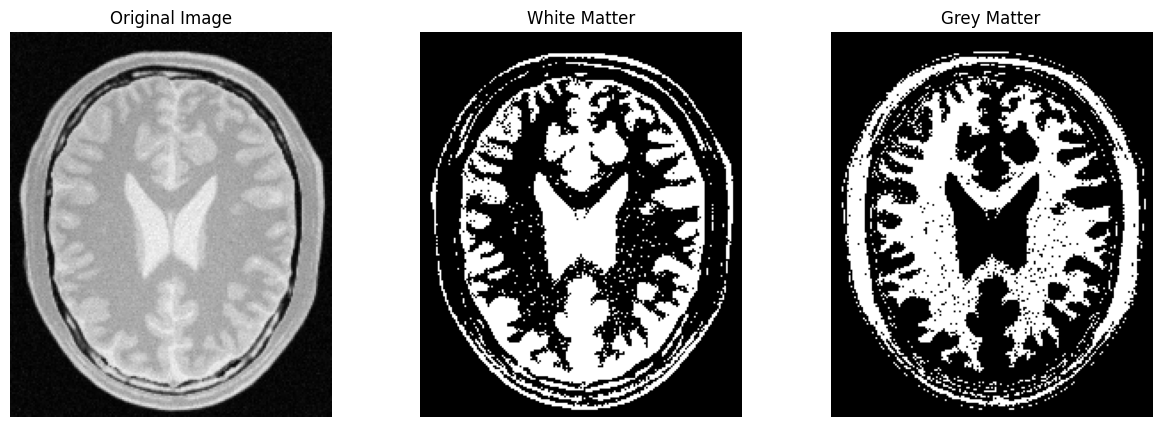

In [30]:
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 
 
f = cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE) 
assert f is not None 

t1 = np.zeros(180) 
t2 = 255*np.ones(76) 
t = np.concatenate((t1,t2),axis=0).astype(np.uint8) 
assert len(t)==256 

s1 = np.zeros(140) 
s2 = 255*np.ones(40) 
s3 = np.zeros(76) 
s = np.concatenate((s1,s2,s3),axis=0).astype(np.uint8) 
assert len(s)==256 

g = cv.LUT(f,t) 
h = cv.LUT(f,s) 

plt.hist(f.ravel(), 256, [0, 256])
plt.title("Histogram of Brain Image")
plt.show()


fig, ax = plt.subplots(1,2,figsize=(8,8)) 
ax[0].plot(t), ax[0].set_aspect('equal'), ax[0].set_title("Intensity transformation \n for white matter")
ax[1].plot(s), ax[1].set_aspect('equal'), ax[1].set_title("Intensity transformation \n for gray matter")
plt.show()

plt.figure(figsize=(15, 5))
# Plot the results
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.title('White Matter')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(h,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.title('Grey Matter')
plt.show()



Question 3

In [ ]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 
 
img = cv.imread("highlights_and_shadows.jpg") 
L, a, b = cv.split(cv.cvtColor(img, cv.COLOR_BGR2LAB)) 
gamma = [0.2, 0.8, 1.2, 2] 
 
for i in gamma: 
    t = np.array([(p/255)**i*255 for p in range(0,256)]).astype(np.uint8) 
    g = cv.LUT(L,t) 
 
    fig, ax = plt.subplots(figsize=(3,3)) 
    ax.set_title("\u03B3 = "+ str(i)), plt.xlim([0,256]), ax.plot(t) 
    fig, ax = plt.subplots(1,2, figsize = (8,8)) 
    ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[0].set_title('Original Image'), ax[0].ax
    corrected_img = cv.merge([g, a, b]) 
    ax[1].imshow(cv.cvtColor(corrected_img,cv.COLOR_LAB2RGB)), ax[1].set_title('Gamma corrected 
    plt.show() 
 
    #Question 3 (b) 
    hist1 = cv.calcHist([img],[0],None,[256],[0,256]) 
    plt.plot(hist1), plt.xlim([0,256]) 
    hist2 = cv.calcHist([corrected_img],[0],None,[256],[0,256]) 
    plt.plot(hist2), plt.xlim([0,256]), plt.legend(('original','gamma corrected'),loc='upper left
    plt.show()